In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
df = pd.read_csv('census_donors.csv' , delimiter = ',', header = 0 ,skipinitialspace = True)
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [217]:
df.shape

(45222, 14)

In [218]:
df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [219]:
def descriptive_analysis(df):
    Data_dict = pd.DataFrame(df.dtypes)
    Data_dict['MissingVal'] = df.isnull().sum()
    Data_dict['UniqueVal'] = df.nunique()
    Data_dict['Count'] = df.count()
    Data_dict = Data_dict.rename(columns = {0:'DataType'})
    return Data_dict

In [220]:
Data_dict = descriptive_analysis(df)

In [221]:
Data_dict

,DataType,MissingVal,UniqueVal,Count
age,int64,0,74,45222
workclass,object,0,7,45222
education_level,object,0,16,45222
education-num,float64,0,16,45222
marital-status,object,0,7,45222
occupation,object,0,14,45222
relationship,object,0,6,45222
race,object,0,5,45222
sex,object,0,2,45222
capital-gain,float64,0,121,45222


In [222]:
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [223]:
len(df.income)

45222

In [224]:
less_than_50K = df.income.value_counts()[0]/len(df.income)
greater_than_50K = df.income.value_counts()[1]/len(df.income)
print('Less than 50K: {} , Greater than 50K: {}'.format(less_than_50K,greater_than_50K))

Less than 50K: 0.7521560302507629 , Greater than 50K: 0.2478439697492371


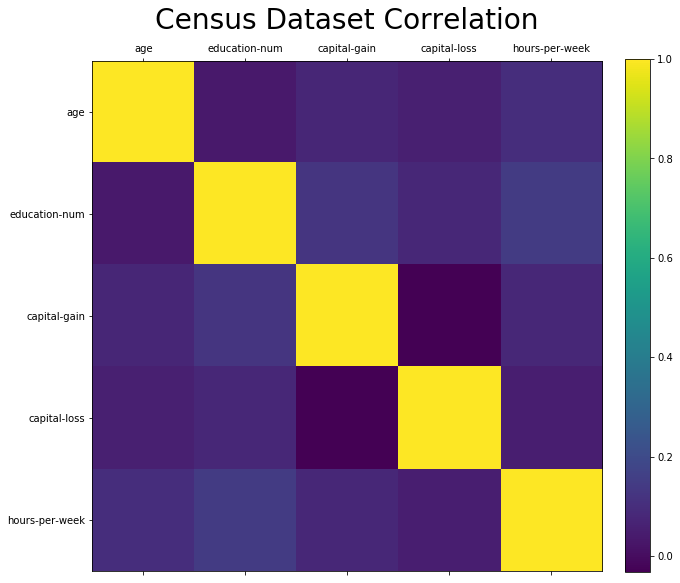

In [225]:
def plotting_corr(df , size = 10):
    corr = df.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Census Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(df , size = 10)

In [226]:
df['income'] = df['income'].map(lambda x : 1 if x=='>50K' else 0)
df.income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [227]:
df['sex'].value_counts()

Male      30527
Female    14695
Name: sex, dtype: int64

In [228]:
def feature_scaling(df):
        df-=df.min()
        df/=df.max()
        return df

In [229]:
df['capital-gain'] = feature_scaling(df['capital-gain'])
df['capital-loss'] = feature_scaling(df['capital-loss'])


In [230]:
df['age'] = feature_scaling(df['age'])
df['education-num'] = feature_scaling(df['education-num'])
df['hours-per-week'] = feature_scaling(df['hours-per-week'])

In [231]:
df.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,0
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,0
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,0
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States,1
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.140841,0.0,0.500000,United-States,1
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.051781,0.0,0.397959,United-States,1


In [232]:
labels = df['income']
features = df.drop('income', axis = 1)

In [233]:
features.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [234]:
encoded_features = pd.get_dummies(features)
encoded_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=103)

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(encoded_features,labels, test_size=0.33, random_state=42)


In [236]:
clf = RandomForestClassifier(n_estimators = 50 , max_features = 'sqrt')
clf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [237]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

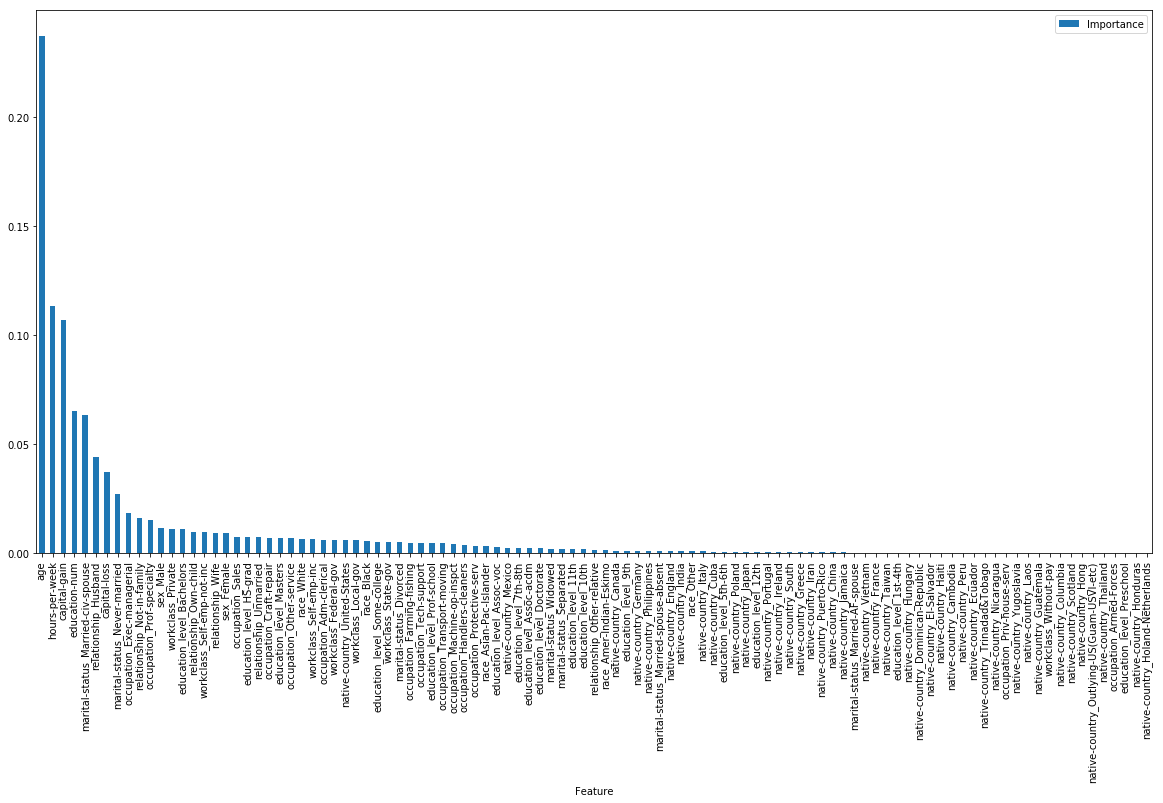

In [238]:
features.plot(kind='bar', figsize=(20, 10))

In [239]:
model = SelectFromModel(clf , prefit = True)
X_train_new = model.transform(X_train)
X_train_new.shape

(30298, 15)

In [240]:
X_test_new = model.transform(X_test)
X_test_new.shape

(14924, 15)

In [241]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [242]:
predictions = model.predict(X_test)

In [243]:
from sklearn.metrics import classification_report,recall_score,roc_curve,roc_auc_score

In [244]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.96      0.90     11216
          1       0.80      0.50      0.61      3708

avg / total       0.84      0.84      0.83     14924




--------------Plotting_AUC_ROC_Curve--------------------------------


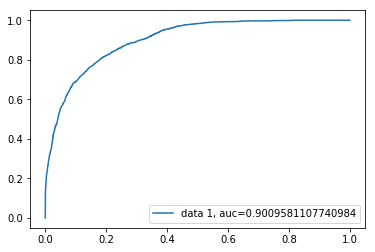

In [245]:
print("\n--------------Plotting_AUC_ROC_Curve--------------------------------")
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [246]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(C = 0.01 , penalty='l1' , dual = False)
svc_clf.fit(X_train ,y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [247]:
model = SelectFromModel(svc_clf , prefit = True)
train_new = model.transform(X_train)
train_new.shape

(30298, 28)

In [248]:
test_new = model.transform(X_test)
test_new.shape

(14924, 28)

In [249]:
parameters = {'C': 0.01 ,
              'penalty' : 'l1' ,
              'dual' : False ,
              'fit_intercept' : True ,
              'intercept_scaling' : 1,
              'loss' : 'squared_hinge' ,
              'max_iter' : 1000,
              'multi_class' : 'ovr' ,
              'penalty' : 'l1' ,
              'random_state' : None ,
              'tol': 0.0001 ,
              'verbose' : 0}
model = LinearSVC(**parameters)
model.fit(X_train ,y_train)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [250]:
predictions = model.predict(X_test)

In [251]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.94      0.90     11216
          1       0.76      0.55      0.64      3708

avg / total       0.84      0.85      0.84     14924



In [253]:
from sklearn.neighbors import KNeighborsClassifier

Knn_clf = KNeighborsClassifier(n_neighbors = 3)
Knn_clf.fit(X_train ,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [254]:
model = SelectFromModel(svc_clf , prefit = True)
train_new = model.transform(X_train)
train_new.shape


(30298, 28)

In [255]:
test_new = model.transform(X_test)
test_new.shape

(14924, 28)

In [257]:
predictions = Knn_clf.predict(X_test)


In [258]:
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.89      0.88     11216
          1       0.64      0.57      0.60      3708

avg / total       0.81      0.81      0.81     14924

